In [120]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import datetime
import matplotlib.pyplot as plt
import numpy as np



In [121]:
df = pd.read_csv('D://test/bd prognozowanie.csv', encoding='cp1251', sep = ';')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
df.head()

,Код клиента,Страна происхождения клиента,Серия,Назначение,Наименование изделия,характеристики товара,артикул,Тип отделки,Остатки на начало месяца (или конец предыдущего),Дата конца месяца (месяц заказа),"Заказ, шт",Факт поставки
0,NaN,NaN,Дуэт,Спальня,Шкаф для одежды,3-х дверный,233-01/03,Без отделки,NaN,31.05.2020,1.0,NaN
1,NaN,NaN,Дуэт,Спальня,Шкаф для одежды,3-х дверный (без зеркала),233-01/03Б,Без отделки,NaN,31.05.2020,1.0,NaN
2,NaN,NaN,Дуэт,Спальня,Шкаф для одежды,4-х дверный (без зеркала),233-01/04Б,Без отделки,NaN,31.05.2020,1.0,NaN
3,NaN,NaN,Дуэт,Спальня,Комод,NaN,233-04,Без отделки,NaN,31.05.2020,5.0,NaN
4,NaN,NaN,Дуэт,Спальня,Зеркало,NaN,233-05,Без отделки,NaN,31.05.2020,2.0,NaN


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047939 entries, 0 to 1047938
Data columns (total 12 columns):
Код клиента                                         0 non-null float64
Страна происхождения клиента                        0 non-null float64
Серия                                               2298 non-null object
Назначение                                          2298 non-null object
Наименование изделия                                2298 non-null object
характеристики товара                               984 non-null object
артикул                                             2298 non-null object
Тип отделки                                         2298 non-null object
Остатки на начало месяца (или конец предыдущего)    0 non-null float64
Дата конца месяца (месяц заказа)                    2298 non-null object
Заказ, шт                                           2298 non-null float64
Факт поставки                                       0 non-null float64
dtypes: float64(5),

In [124]:
# заполним недостающие данные
# код клиента предположим, что у нас  клинта оптовик(1), розничный магазин(2)

def cod_customer(data):
    return random.randint(1, 2)
df['Код клиента'] = df['Код клиента'].apply(cod_customer)

In [125]:
# заполним недостающие данные
# код клиента предположим, что у нас  РБ(1), РОССИЯ(2), Казахстан(3)

def cod_country(data):
    return random.randint(1, 3)
df['Страна происхождения клиента'] = df['Страна происхождения клиента'].apply(cod_customer)

In [126]:
df.head()

,Код клиента,Страна происхождения клиента,Серия,Назначение,Наименование изделия,характеристики товара,артикул,Тип отделки,Остатки на начало месяца (или конец предыдущего),Дата конца месяца (месяц заказа),"Заказ, шт",Факт поставки
0,2,2,Дуэт,Спальня,Шкаф для одежды,3-х дверный,233-01/03,Без отделки,NaN,31.05.2020,1.0,NaN
1,1,1,Дуэт,Спальня,Шкаф для одежды,3-х дверный (без зеркала),233-01/03Б,Без отделки,NaN,31.05.2020,1.0,NaN
2,1,2,Дуэт,Спальня,Шкаф для одежды,4-х дверный (без зеркала),233-01/04Б,Без отделки,NaN,31.05.2020,1.0,NaN
3,2,1,Дуэт,Спальня,Комод,NaN,233-04,Без отделки,NaN,31.05.2020,5.0,NaN
4,1,2,Дуэт,Спальня,Зеркало,NaN,233-05,Без отделки,NaN,31.05.2020,2.0,NaN


In [127]:
df['Заказ, шт'] = pd.to_numeric(df['Заказ, шт'], errors='coerce')
df['Заказ, шт'] = df['Заказ, шт'].fillna(0)

In [128]:
df['Остатки на начало месяца (или конец предыдущего)'] = df['Остатки на начало месяца (или конец предыдущего)'].fillna(0)

In [129]:
for row in range(0, 2298):
    offer = df.loc[row]['Заказ, шт']
    df.loc[row, 'Остатки на начало месяца (или конец предыдущего)'] = round(random.uniform(0, 3) * offer, 0)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047939 entries, 0 to 1047938
Data columns (total 12 columns):
Код клиента                                         1047939 non-null int64
Страна происхождения клиента                        1047939 non-null int64
Серия                                               2298 non-null object
Назначение                                          2298 non-null object
Наименование изделия                                2298 non-null object
характеристики товара                               984 non-null object
артикул                                             2298 non-null object
Тип отделки                                         2298 non-null object
Остатки на начало месяца (или конец предыдущего)    1047939 non-null float64
Дата конца месяца (месяц заказа)                    2298 non-null object
Заказ, шт                                           1047939 non-null float64
Факт поставки                                       0 non-null float64
dt

In [131]:
for row in range(0, 2298):
    offer = df.loc[row]['Заказ, шт']
    #print(round(random.uniform(0, 1) * offer, 0))
    df.loc[row, 'Факт поставки'] = round(random.uniform(0, 1) * offer, 0)

In [132]:
df.head()

,Код клиента,Страна происхождения клиента,Серия,Назначение,Наименование изделия,характеристики товара,артикул,Тип отделки,Остатки на начало месяца (или конец предыдущего),Дата конца месяца (месяц заказа),"Заказ, шт",Факт поставки
0,2,2,Дуэт,Спальня,Шкаф для одежды,3-х дверный,233-01/03,Без отделки,0.0,31.05.2020,1.0,1.0
1,1,1,Дуэт,Спальня,Шкаф для одежды,3-х дверный (без зеркала),233-01/03Б,Без отделки,3.0,31.05.2020,1.0,1.0
2,1,2,Дуэт,Спальня,Шкаф для одежды,4-х дверный (без зеркала),233-01/04Б,Без отделки,3.0,31.05.2020,1.0,0.0
3,2,1,Дуэт,Спальня,Комод,NaN,233-04,Без отделки,11.0,31.05.2020,5.0,3.0
4,1,2,Дуэт,Спальня,Зеркало,NaN,233-05,Без отделки,2.0,31.05.2020,2.0,1.0


In [133]:
df_train = df[df.index < 2298].copy()

In [134]:
dict_series = {'Дуэт ': 'duet', 'Нинель': 'Ninel', 'Сабрина': 'Sabrina', 
               'Соната': 'Sonata', 'Трио': 'Trio', 'Влада': 'Vlada', 
               'Глория': 'Gloria', 'Лаура': 'Laura', 'Лика': 'Lika', 'Лолита': 'Lolita', 
               'Лорена': 'Lorena', 'Луиза': 'Louise', 'Милана': 'Milan', 'Мокко': 'Mocha',
               'Оливия': 'Olivia', 'Оскар': 'Oscar', 'Яна': 'Yana', 'Давиль': 'Daville', 
               'Полонез': 'Polonaise', 'Луи': 'Louis', 'Янина': 'Ioannina',
               'Амадей': 'Amadeus', 'Оксфорд': 'Oxford', 'Грация': 'Grace', 
               'Вика': 'Vika', 'Орхидея': 'Orchid', 'Стелла': 'Stella', 'Турин': 'Turin'}

In [135]:
df_train['Серия'] = df_train['Серия'].apply(lambda row: dict_series[row])

In [136]:
df_train.head(1)

,Код клиента,Страна происхождения клиента,Серия,Назначение,Наименование изделия,характеристики товара,артикул,Тип отделки,Остатки на начало месяца (или конец предыдущего),Дата конца месяца (месяц заказа),"Заказ, шт",Факт поставки
0,2,2,duet,Спальня,Шкаф для одежды,3-х дверный,233-01/03,Без отделки,0.0,31.05.2020,1.0,1.0


In [137]:
le = LabelEncoder()
le.fit(df_train['Серия'])
df_train['Series_code'] = le.transform(df_train['Серия'])

In [138]:
dict_name_goods = {'Шкаф для одежды': 'Wardrobe', 'Комод': 'Chest of drawers', 
                   'Зеркало': 'Mirror', 'Кровать': 'Bed', 'Тумба прикроватная': 'Nightstand', 
                   'Стол туалетный': 'Dressing table', 'Шкаф комбинированный': 'Combined cabinet',
                   'Стол письменный': 'Desk', 'Полка': 'Shelf', 'Тумба': 'Curbstone', 
                   'Сундук': 'Chest', 'Банкетка': 'Bench', 'Шкаф с витриной': 'Wardrobe with showcase', 
                   'Стол обеденный': 'Dining table', 'Шкаф навесной': 'Wall cabinet', 'Цоколь': 'Plinth',
                   'Стол журнальный': 'Coffee table', 'Тумба под телевизор': 'TV table', 
                   'Щит навесной': 'Hinged shield', 'Консоль': 'Console'}

In [139]:
df_train['Наименование изделия'] = df_train['Наименование изделия'].apply(lambda row: dict_name_goods[row])

In [140]:
le = LabelEncoder()
le.fit(df_train['Наименование изделия'])
df_train['name_goods_code'] = le.transform(df_train['Наименование изделия'])

In [141]:
dict_name_aim ={'Спальня': 'Bedroom', 'Общая комната': 'common room', 'Столовая': 'Canteen', 
                'Гостинная': 'Living room', 'Банкетки': 'Banquet',
                'Шкаф для одежды': 'Wardrobe', 'Кровать': 'Bed', 
                'Тумба прикроватная': 'Nightstand', 'Комод': 'Chest of drawers',
                'Зеркало': 'Mirror', 'Стол туалетный': 'Dressing table', 'Шкаф комбинированный': 'Combined cabinet',
                'Стол письменный': 'Desk', 'Полка': 'Shelf', 'Тумба': 'Curbstone', 'Сундук': 'Chest',
                'Банкетка': 'Bench', 'Шкаф с витриной': 'Wardrobe with showcase', 
                'Стол обеденный': 'Dining table', 'Стол журнальный': 'Coffee table',
                'Шкаф навесной': 'Wall cabinet', 'Цоколь': 'Plinth', 
                'Тумба под телевизор': 'TV table', 'Консоль': 'Console',
                'Щит навесной': 'Hinged shield', 'Библиотека': 'Library'}

In [142]:
df_train['Назначение'] = df_train['Назначение'].apply(lambda row: dict_name_aim[row])

In [143]:
le = LabelEncoder()
le.fit(df_train['Назначение'])
df_train['name_aim_code'] = le.transform(df_train['Назначение'])

In [144]:
df_train['NAN_characteristic'] = pd.isna(df_train['характеристики товара']).astype('int')

In [145]:
df_train['characteristic'] = df_train['NAN_characteristic'].apply(lambda x: 0 if (x == 1) else 1)

In [146]:
df_train['month'] = df_train['Дата конца месяца (месяц заказа)'].apply(lambda x: pd.to_datetime(x).month)

In [147]:
df_train['артикул'] = df_train['артикул'].str.replace('Б', 'B')
df_train['артикул'] = df_train['артикул'].str.replace('б', 'B')
df_train['артикул'] = df_train['артикул'].str.replace('Р', 'R')
df_train['артикул'] = df_train['артикул'].str.replace('З', 'Z')
df_train['артикул'] = df_train['артикул'].str.replace('У', 'U')
df_train['артикул'] = df_train['артикул'].str.replace('П', 'P')

In [148]:
le = LabelEncoder()
le.fit(df_train['артикул'])
df_train['articul_code'] = le.transform(df_train['артикул'])

In [149]:
df_train.head()

,Код клиента,Страна происхождения клиента,Серия,Назначение,Наименование изделия,характеристики товара,артикул,Тип отделки,Остатки на начало месяца (или конец предыдущего),Дата конца месяца (месяц заказа),"Заказ, шт",Факт поставки,Series_code,name_goods_code,name_aim_code,NAN_characteristic,characteristic,month,articul_code
0,2,2,duet,Bedroom,Wardrobe,3-х дверный,233-01/03,Без отделки,0.0,31.05.2020,1.0,1.0,27,18,2,0,1,5,145
1,1,1,duet,Bedroom,Wardrobe,3-х дверный (без зеркала),233-01/03B,Без отделки,3.0,31.05.2020,1.0,1.0,27,18,2,0,1,5,146
2,1,2,duet,Bedroom,Wardrobe,4-х дверный (без зеркала),233-01/04B,Без отделки,3.0,31.05.2020,1.0,0.0,27,18,2,0,1,5,147
3,2,1,duet,Bedroom,Chest of drawers,NaN,233-04,Без отделки,11.0,31.05.2020,5.0,3.0,27,3,2,1,0,5,151
4,1,2,duet,Bedroom,Mirror,NaN,233-05,Без отделки,2.0,31.05.2020,2.0,1.0,27,12,2,1,0,5,152


In [150]:
df_model = df_train[['Остатки на начало месяца (или конец предыдущего)', 'Заказ, шт', 'Series_code', 
                     'name_goods_code', 'name_aim_code', 'NAN_characteristic', 
                     'characteristic', 'month', 'articul_code']]
Y = df_train['Факт поставки']

In [151]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from math import *


In [152]:
def StandardScaler_column(d_col):
    scaler = StandardScaler()
    scaler.fit(df_model[[d_col]])
    return scaler.transform(df_model[[d_col]])

for column in df_model.columns:
    df_model[column] = StandardScaler_column(column)
    if len(df_model[df_model[column].isna()]) < len(df_model):
        df_model[column] = df_model[column].fillna(0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df_model, Y, test_size=0.2, random_state=42)

In [154]:
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=42)

In [155]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=1,
                      warm_start=False)

In [156]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [157]:
pred_y = []
for element in y_pred:
    pred_y.append(trunc(element))

In [158]:
pred_y = pd.DataFrame(pred_y)

In [159]:
MAE = metrics.mean_absolute_error(y_test, pred_y)
print('MAE:', MAE)

MAE: 1.1717391304347826


In [160]:
y_test_list = []
for element in y_test:
    y_test_list.append(element)

In [161]:
pred = pd.concat([pd.DataFrame(y_test_list),pred_y], axis=1)
pred.columns = ['факт реализации', 'прогноз']

In [162]:
# факт и прогноз

pred

,факт реализации,прогноз
0,2.0,1
1,0.0,1
2,1.0,0
3,2.0,2
4,2.0,1
...,...,...
455,1.0,1
456,1.0,0
457,1.0,4
458,0.0,2


In [163]:
date = []
for i in X_test.index:
    date.append(df.loc[i, 'Дата конца месяца (месяц заказа)']) 
    

In [164]:
pred = pd.concat([pred, pd.DataFrame(date)], axis=1)
pred.columns = ['факт реализации', 'прогноз', 'date']

In [165]:
pred.head()

,факт реализации,прогноз,date
0,2.0,1,31.03.2020
1,0.0,1,31.01.2020
2,1.0,0,31.05.2020
3,2.0,2,31.03.2020
4,2.0,1,31.05.2020


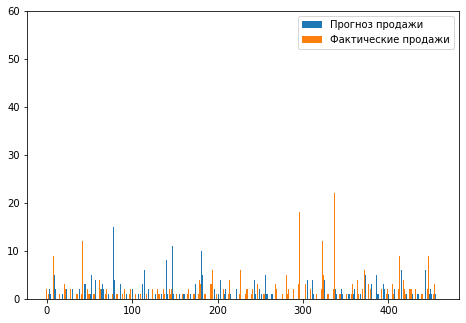

In [173]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = pred.index, height = pred['прогноз'], 
                width = 0.4, align = 'edge', label = 'Прогноз продажи')
axes.bar(x = pred.index, height = pred['факт реализации'], 
                width = -0.4, align = 'edge', label = 'Фактические продажи')
axes.legend(loc = 1)

In [166]:
pred_1 = pred.groupby('date').agg({'факт реализации': 'sum', 'прогноз': 'sum'}).reset_index()

In [169]:
pred_1.head()

,date,факт реализации,прогноз
0,29.02.2020,194.0,165
1,30.04.2020,113.0,68
2,31.01.2020,284.0,226
3,31.03.2020,208.0,176
4,31.05.2020,112.0,61


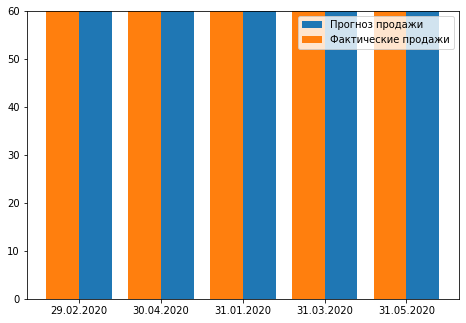

In [172]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = pred_1.date, height = pred_1['прогноз'], 
                width = 0.4, align = 'edge', label = 'Прогноз продажи')
axes.bar(x = pred_1.date, height = pred_1['факт реализации'], 
                width = -0.4, align = 'edge', label = 'Фактические продажи')
axes.legend(loc = 1)

In [ ]:
X_test.head()

In [ ]:
df.head()

In [ ]:
df.loc[0, 'Дата конца месяца (месяц заказа)']